## **Step 1 - Data Exploration**
The first cell imports the necessary libraries and sets up the environment.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

# Set up seaborn style
sns.set(style="whitegrid")

# Check for GPU availability
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

/home/yazata/venvs/ai_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


## **2. Load and Inspect the Data**

This section reads the dataset, ensures no missing values, and provides a quick overview.

In [3]:
# Load the dataset
data = pd.read_csv("../data/train.csv")

# Ensure there are no missing values in 'premise' or 'hypothesis'
data = data.dropna(subset=["premise", "hypothesis"])

# Display the first few rows for inspection
print("Sample Data:")
print(data.head())

# Display the total number of samples
print(f"\nTotal Samples: {len(data)}")

Sample Data:
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-là font une di...   
3  5622f0c60b  you know they can't really defend themselves l...   
4  86aaa48b45  ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...   

                                          hypothesis lang_abv language  label  
0  The rules developed in the interim were put to...       en  English      0  
1  Practice groups are not permitted to work on t...       en  English      2  
2              J'essayais d'accomplir quelque chose.       fr   French      0  
3  They can't defend themselves because of their ...       en  English      0  
4    เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร       th     Thai      1  

Total Samples: 12120


## **3. Language Distribution**

Analyze the distribution of languages in the dataset.


Language Distribution:
language
English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: count, dtype: int64


/tmp/ipykernel_7389/1409895968.py:10: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  sns.barplot(x=language_distribution.index, y=language_distribution.values,hue=language_distribution.values, palette=colors)


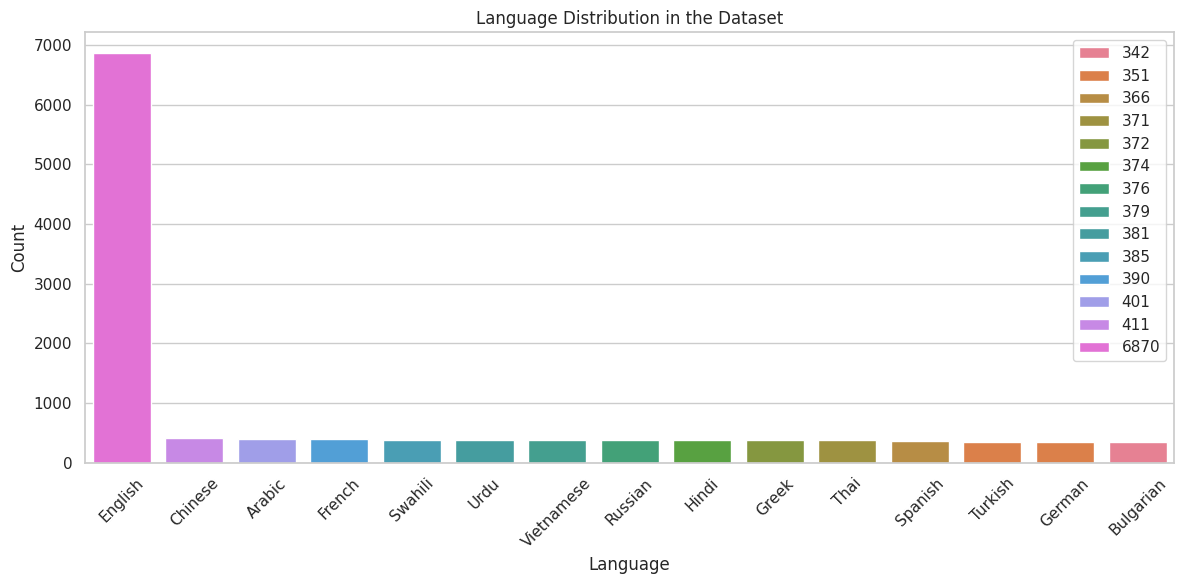

In [16]:
# Analyze the distribution of languages
language_distribution = data["language"].value_counts()
colors = sns.color_palette('husl', len(language_distribution))
# Print language distribution
print("\nLanguage Distribution:")
print(language_distribution)

# Plot the distribution of languages
plt.figure(figsize=(12, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values,hue=language_distribution.values, palette=colors)
plt.title("Language Distribution in the Dataset")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("imbalance_data_dist.png")
plt.show()

## **4. Label Distribution**

Examine the overall label distribution and label distribution by language.
### **4.1 Overall Label Distribution**


Overall Label Distribution:
label
0    4176
2    4064
1    3880
Name: count, dtype: int64


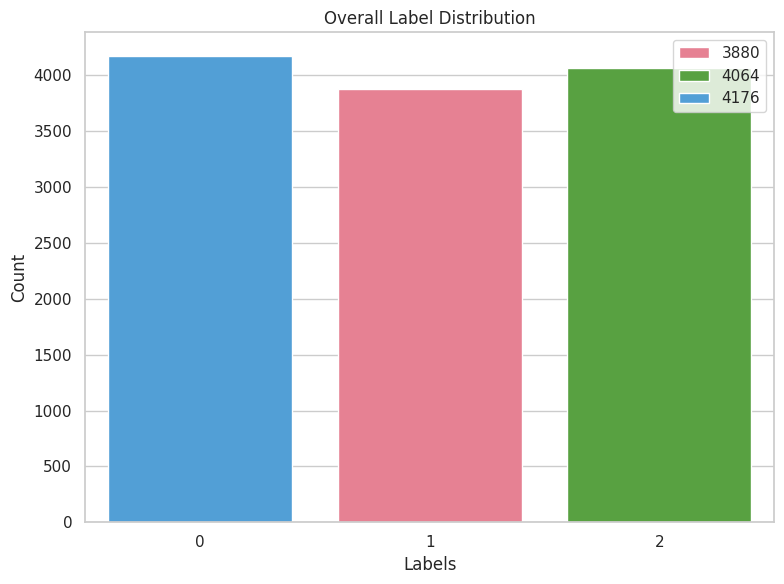

In [9]:
# Analyze overall label distribution
label_distribution = data["label"].value_counts()
palette = sns.color_palette("husl", len(label_distribution))

# Print overall label distribution
print("\nOverall Label Distribution:")
print(label_distribution)

# Plot overall label distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values,  hue=label_distribution.values, palette=palette)
plt.title("Overall Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("imbalance_data_label.png")
plt.show()

### **4.2 Label Distribution by Language**


Label Distribution by Language:
label          0     1     2
language                    
Arabic       124   129   148
Bulgarian    123   111   108
Chinese      140   146   125
English     2427  2166  2277
French       133   129   128
German       108   116   127
Greek        120   127   125
Hindi        125   112   137
Russian      132   124   120
Spanish      118   112   136
Swahili      140   109   136
Thai         121   126   124
Turkish      110   114   127
Urdu         133   110   138
Vietnamese   122   149   108


<Figure size 1400x800 with 0 Axes>

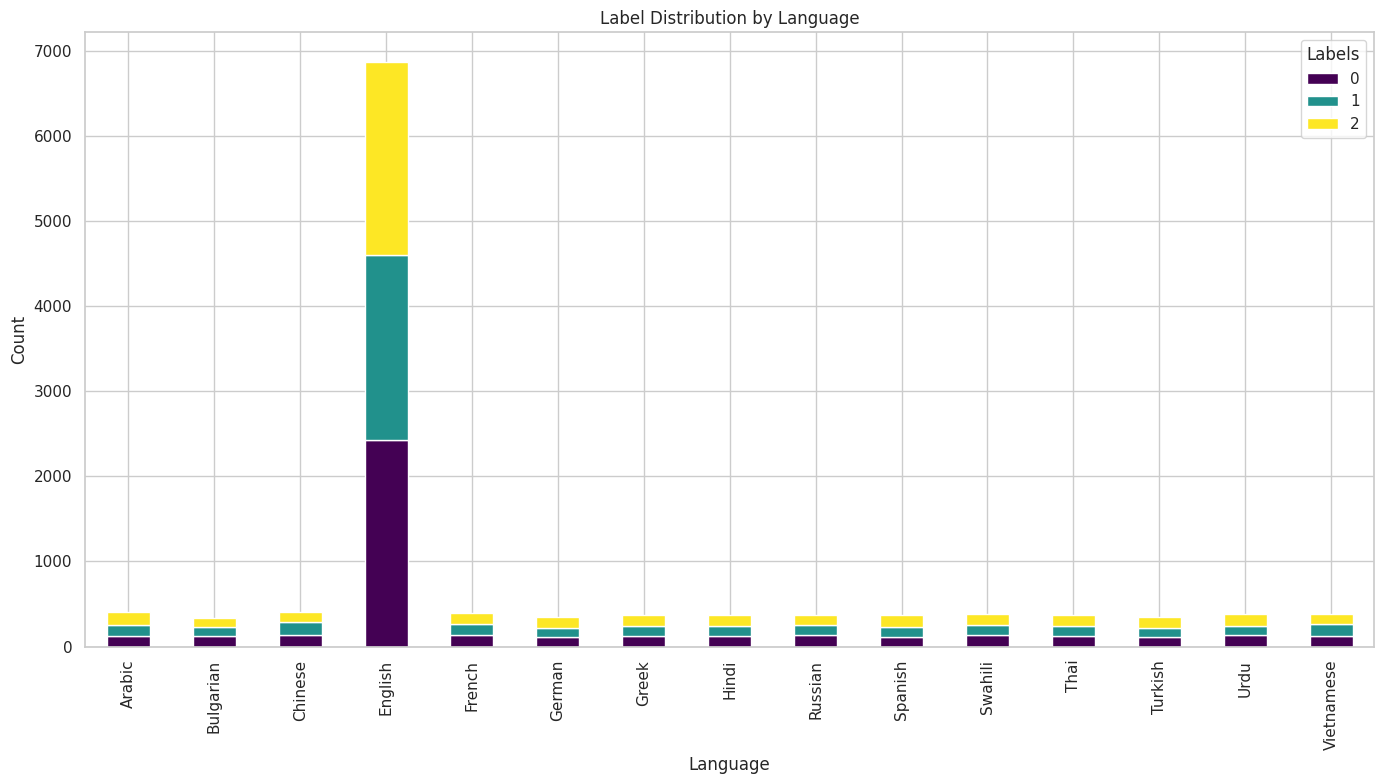

In [17]:
# Analyze label distribution by language
language_label_distribution = data.groupby("language")["label"].value_counts().unstack(fill_value=0)

# Print label distribution by language
print("\nLabel Distribution by Language:")
print(language_label_distribution)

# Plot label distribution for each language
plt.figure(figsize=(14, 8))
language_label_distribution.plot(kind="bar", stacked=True, colormap="viridis", figsize=(14, 8))
plt.title("Label Distribution by Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Labels")
plt.tight_layout()
plt.savefig("imbaalnce_data_label_per_lang.png")
plt.show()

## **5. Sentence Length Analysis**

Analyze sentence lengths to determine optimal tokenization parameters.
### **5.1 Tokenize and Compute Lengths**

In [19]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

# Function to calculate sentence lengths
def calculate_lengths(data):
    data["premise_length"] = data["premise"].apply(lambda x: len(tokenizer.tokenize(x)))
    data["hypothesis_length"] = data["hypothesis"].apply(lambda x: len(tokenizer.tokenize(x)))
    data["combined_length"] = data["premise_length"] + data["hypothesis_length"]
    return data

# Analyze sentence lengths
data = calculate_lengths(data)

### **5.2 Overall Length Statistics**


Overall Length Statistics:
       premise_length  hypothesis_length  combined_length
count    12120.000000       12120.000000     12120.000000
mean        27.370875          13.620792        40.991667
std         16.827574           5.700629        19.403881
min          2.000000           2.000000         5.000000
25%         15.000000          10.000000        27.000000
50%         24.000000          13.000000        39.000000
75%         37.000000          17.000000        52.000000
max        226.000000          58.000000       242.000000


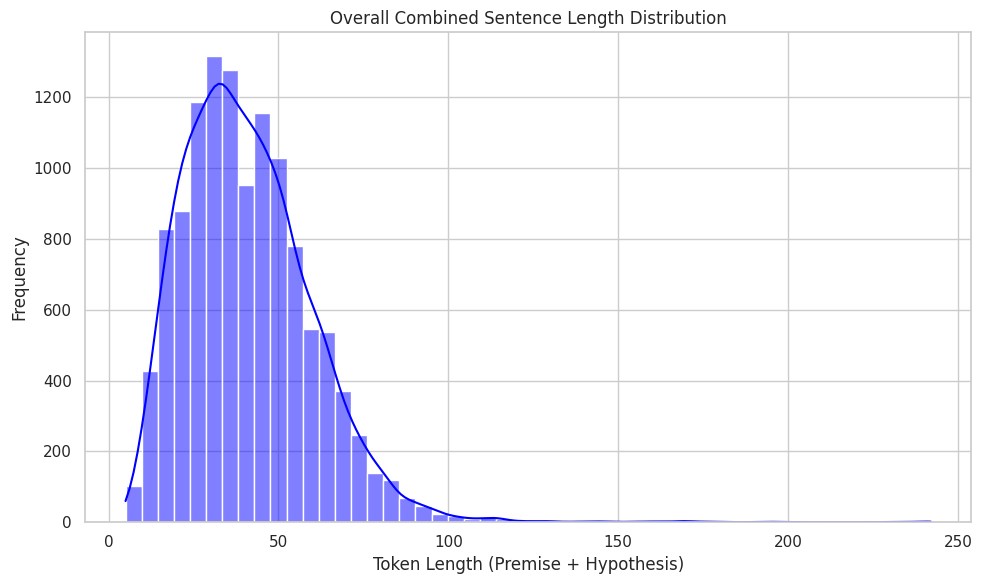

In [20]:
# Overall sentence length statistics
print("\nOverall Length Statistics:")
print(data[["premise_length", "hypothesis_length", "combined_length"]].describe())

# Plot overall sentence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["combined_length"], bins=50, kde=True, color="blue")
plt.title("Overall Combined Sentence Length Distribution")
plt.xlabel("Token Length (Premise + Hypothesis)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("imbaalnce_data_sentence_length.png")
plt.show()

## **Conclusions**
### **1. Language Distribution**

- The dataset is dominated by **English (6870 samples, ~57%)**. Other languages, like **Chinese, Arabic, and French**, have far fewer samples **(~342–411)**. This imbalance could bias the model towards English.

### **2. Label Distribution**

- The dataset labels (0: entailment, 1: neutral, 2: contradiction) are moderately balanced:
    - **Label 0: 4176 samples (34%)**
    - **Label 1: 3880 samples (32%)**
    - **Label 2: 4064 samples (34%)**
- However, per-language label distributions show some imbalances, e.g., **Arabic favors Label 1 and Vietnamese favors Label 0**.

### **3. Sentence Length Analysis**

- Average combined length (premise + hypothesis): **41 tokens**
(Premise: ~27 tokens, Hypothesis: ~13 tokens).
- Most samples fit within **128 tokens**, but some outliers (up to 242 tokens) may require truncation.